<a href="https://colab.research.google.com/github/nicolascarva/Kaggle-Tanzanian-Water-Pump/blob/Full-Wrangle/Nicolas_Carvajal_DS_module_project_221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

In [6]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'

     |████████████████████████████████| 81kB 4.1MB/s 
     |████████████████████████████████| 245kB 6.4MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
     |████████████████████████████████| 604kB 8.7MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
     |████████████████████████████████| 3.1MB 11.0MB/s 
     |████████████████████████████████| 296kB 49.7MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=e39f728dd037511af15a6d00a7558cfd14e2de13e1fe725f0b0bd783cadd0ef7
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.0-cp36-none-any.whl size=599738 sha256=6754ad040259ef53d07e8ace447756f94c5b6198ffd16c297189227ff4c3a0e1
  Stored in directory: /root/.cache/pip/wheels/af/54/11/aba77f21075918de02f7964eabfe8c10d5542df9e6ad10b225
Successfully built htmlmin phik
ERROR: google

In [9]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from pandas_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.feature_selection import SelectKBest
import graphviz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Decision Trees

## Kaggle

**Task 1:** [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website (the URL is in Slack). Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.

## Wrangle Data

**Task 2:** Add to the code below so that `id` is set as the index for `df`.

In [70]:
import pandas as pd

# df = pd.merge(pd.read_csv(DATA_PATH + 'waterpumps/train_features.csv'),
#               pd.read_csv(DATA_PATH + 'waterpumps/train_labels.csv'))
# YOUR CODE HERE
def wrangle(filepath1, filepath2=None):
  df_=pd.read_csv(filepath1, parse_dates= ['date_recorded'])
  
  if filepath2:
    df = pd.merge(df_,
              pd.read_csv(filepath2), on='id').set_index('id')
    
  else:
    df=df_.set_index('id')
 

 ##Change 0s in Lat and Long to NaN
  df['latitude'] = df['latitude'].mask(df['latitude'].abs() < .05, np.NaN)
  df['longitude'] = df['longitude'].mask(df['longitude'].abs() < .05, np.NaN) 
  mean_pos=df[['region_code','latitude', 'longitude']].groupby('region_code').mean()
  # long_mean_rc=df[['region_code','longitude']].groupby('region_code').mean()
  ##Replace NaNs with 
  for x in df.index.to_list():
   if df.loc[x,'latitude'] != df.loc[x,'latitude']:
     naregioncode=df.loc[x, 'region_code']
     reg_mean_lat=mean_pos.loc[naregioncode,'latitude']
     reg_mean_long=mean_pos.loc[naregioncode,'longitude']

     df.loc[x,'latitude']=reg_mean_lat
     df.loc[x,'longitude']=reg_mean_long


  # Cells dropped because of HC or only 1 value
  drop_cols_hc = [col for col in df.select_dtypes('object') 
                  if (df[col].nunique()>5000) | (df[col].nunique()==1)]

  # ['recorded_by', 'wpt_name', 'scheme_name', 'extraction_type_group','quantity_group', 'source_type', 'waterpoint_type_group']
  df=df.drop(columns=drop_cols_hc)
  print('Columns dropped because of high cardinality: ', drop_cols_hc)
 

  
  
  return df

df=wrangle(DATA_PATH + 'waterpumps/train_features.csv',
           DATA_PATH + 'waterpumps/train_labels.csv')
X_test=wrangle(DATA_PATH + 'waterpumps/test_features.csv')
df.shape

##Calculate mean lat and long values for region code
lat_mean_rc=df[['region_code','latitude']].set_index('region_code').groupby('region_code').mean()
long_mean_rc=df[['region_code','longitude']].set_index('region_code').groupby('region_code').mean()



## for extreme cardinality, scheme name for high percentage of NaN, extraction_type_group and quantity_group, source_type for being repeated

Columns dropped because of high cardinality:  ['wpt_name', 'subvillage', 'recorded_by']
Columns dropped because of high cardinality:  ['wpt_name', 'subvillage', 'recorded_by']


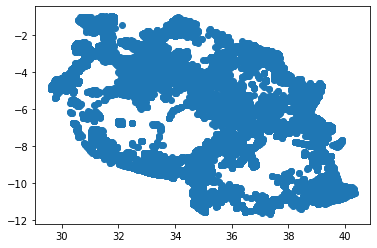

In [71]:
plt.scatter(df['longitude'], df['latitude'])

In [66]:
  # long_mean_rc=df[['region_code','longitude']].groupby('region_code').mean()
long_mean_rc.loc[9,'longitude']

39.77173993602561

In [69]:
long_mean_rc
df['longitude'].value_counts()

26.232339    1057
24.924562     752
34.875276       3
36.802490       2
32.967009       2
             ... 
35.790038       1
29.964104       1
33.926958       1
33.494134       1
35.005922       1
Name: longitude, Length: 57518, dtype: int64

Lat and Long replace with mean of region_code

In [ ]:
#  #Fix lat and long
# lat_mean_rc=df[['region_code','latitude']].set_index('region_code').groupby('region_code').mean()
# long_mean_rc=df[['region_code','longitude']].set_index('region_code').groupby('region_code').mean()
# dfi=df.reset_index()
# # region_code_list=[]
# # for x in lat_mean_rc.index:
# #   region_code_list.append(x)

# # for x in region_code_list:
# #   lat=lat_mean_rc.loc[lat_mean_rc.index==x,'latitude']
# #   latx=df.loc[(df['region_code']==x),'latitude']
# # index=df.loc[df['longitude'].isnull(), 'region_code']
# # df['latitude']=df['latitude'].fillna(lat_mean_rc['latitude'][index])


# # lat=lat_mean_rc.loc[lat_mean_rc.index==x,'latitude']
# # latx=df.loc[(df['region_code']==x),'latitude']

# for i in range(len(df)):
#   if dfi.loc[i, 'latitude']==np.NaN:
#     lat=lat_mean_rc.loc[dfi.loc[i, 'region_code'],'latitude']  
#     dfi.loc[i,'latitude']=lat
#   df['latitude']=dfi['latitude']

  
  
#   #df['latitude'].mask(df['latitude'].abs() < .05)
# # # df['longitude'] = df['longitude'].mask(df['longitude'].abs() < .05, np.NaN)
# plt.scatter(df['longitude'], df['latitude'])

# # row_lat=df['latitude'].isnull()
# df['latitude'].isnull().sum()
# # row_lat
# # lat_mean_rc
# # lat
# # region_code_list
# df['latitude'].isnull().sum()
# # latx

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6091,0.0,2013-02-10,Dwsp,0,DWE,26.232339,-2.754996,0,Lake Victoria,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional
32376,0.0,2011-08-01,Government Of Tanzania,0,Government,24.924562,-1.973762,0,Lake Victoria,Mwanza,19,6,Geita,Nyang'hwale,0,True,VWC,Nyang'hwale,True,0,submersible,submersible,submersible,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
72678,0.0,2013-01-30,Wvt,0,WVT,26.232339,-2.754996,0,Lake Victoria,Shinyanga,17,1,Bariadi,Chinamili,0,False,Parastatal,NaN,False,0,gravity,gravity,gravity,parastatal,parastatal,other,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
56725,0.0,2013-01-17,Netherlands,0,DWE,26.232339,-2.754996,0,Lake Victoria,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
13042,0.0,2012-10-29,Hesawa,0,DWE,24.924562,-1.973762,0,Lake Victoria,Mwanza,19,2,Magu,Malili,0,True,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62177,0.0,2011-07-18,Dwsp,0,DWE,26.232339,-2.754996,0,Lake Victoria,Shinyanga,17,1,Bariadi,Mhunze,0,True,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
3631,0.0,2013-01-22,Dwsp,0,DWE,26.232339,-2.754996,0,Lake Victoria,Shinyanga,17,1,Bariadi,Kinang'weli,0,NaN,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
60843,0.0,2011-07-19,Rwssp,0,DWE,26.232339,-2.754996,0,Lake Victoria,Shinyanga,17,1,Bariadi,Chinamili,0,True,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair


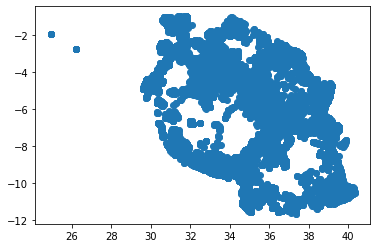

In [67]:
# lat_mean_rc=df[['region_code','latitude']].set_index('region_code').groupby('region_code').mean()
# long_mean_rc=df[['region_code','longitude']].set_index('region_code').groupby('region_code').mean()
# dictlat=lat_mean_rc.to_dict('index')
# dictlong=long_mean_rc.to_dict('index')
# mask = df['latitude'].isnull()


# # dfi['id']=pd.DataFrame(df.loc[mask])
# df['latitude'].fillna(df['region_code'].map(dictlat), inplace=True)
# df['longitude'].fillna(df['region_code'].map(dictlong),inplace=True)
# df['latitude']

# # 

# # df[['latitude', 'longitude']].astype()
# df.dtypes
plt.scatter(df['longitude'], df['latitude'])
df[df['longitude']<28]

In [46]:
long_mean_rc

,longitude
region_code,
1,36.044171
2,36.648738
3,37.505108
4,38.524448
5,37.047041
6,38.754707
7,39.215799
8,38.572954
9,39.771740


In [15]:
for x in df['latitude']:
  if x==np.NaN:
    print('yes')

# df['latitude'].isnull().sum()
# df.info()


In [ ]:
lat_mean_rc.head()

,latitude
region_code,
1,-5.928734
2,-3.231963
3,-3.522823
4,-5.057761
5,-7.400013


In [ ]:

dfi['latitude']=lat_mean_rc.loc[df.loc[mask, 'region_code'], 'latitude']

# df['latitude'].isnull().sum()
# len(dfi)
# mask


NameError: ignored

In [ ]:
# lat_mean_rc.loc[df.loc[mask, 'region_code'], 'latitude']
df.loc[mask, 'region_code']
mask.nunique()

In [ ]:
dfi.loc[7,'region_code']

In [ ]:
lat_mean_rcX=X_test[['region_code','latitude']].set_index('region_code').groupby('region_code').mean()
long_mean_rcX=X_test[['region_code','longitude']].set_index('region_code').groupby('region_code').mean()
lat_mean_rcX
dif=lat_mean_rcX-lat_mean_rc
dif

In [ ]:
df['public_meeting'].isnull().sum()

In [ ]:
##Find relationship between region and region code, make sure no region code represents two different regions:


# reg=pd.merge(df[['region', 'region_code']].set_index('region').groupby('region').min(),df[['region', 'region_code']].set_index('region').groupby('region').max(), on='region')
# reg.head(50)
# listobj=reg.loc[reg['region_code_x']!=reg['region_code_y']].index
# reg_=df.loc[df['region'].isin(listobj)][['region', 'region_code']]
# reg_.drop_duplicates(inplace=True)
# reg_.sort_values(by='region_code').tail(25)

In [ ]:
#Shingyanga and Mwanza share a 17, let's see if it's a mistake:

df.loc[df['region_code']==17]['region'].value_counts()

**Test 2**

In [ ]:
'''Task 2 Testing'''

assert isinstance(df, pd.DataFrame), 'Have you created the DataFrame `df`?'
assert df.shape == (59400, 40), '`df` is the wrong shape. Did you set the index to `id`?'
assert 69572 in df.index, 'The index for `df` is has the wrong values. Did you set the index to `id`?'

## Split Data

**Task 3:** Create your target vector `y` and feature matrix `X`.

In [ ]:
target = 'status_group'

# YOUR CODE HERE
y=df[target]
X=df.drop(columns=target)
X.shape

**Test 3**

In [ ]:
'''Task 3 Testing'''

assert isinstance(X, pd.DataFrame), '`X` is the wrong data type.'
assert isinstance(y, pd.Series), '`y` is the wrong data type.'
assert y.shape == (59400,), '`y` is the wrong shape.'
assert X.shape == (59400,39), '`X` is the wrong shape.'

We already have a test set for this model, the `test.csv` that you'll use to make the predictions you'll upload to Kaggle. However, since our competition only allows for 2 submissions per day, we need a way to estimate our training error so that we can quickly iterate and improve our model. We can achieve this by creating a validation set from the data we have.

**Task 4:** Split `X` and `y` into training and validation sets. Your validation set should be 20% of the data you have. You should have four variables: `X_train`, `X_val`, `y_train`, and `y_val`. 

In [ ]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.2, random_state=42)
X_val.shape

**Test 4**

In [ ]:
'''Task 4 Testing'''

assert X_train.shape == (47520, 39), '`X_train` is the wrong shape.'
assert X_val.shape == (11880, 39), '`X_val` is the wrong shape.'
assert y_train.shape == (47520,), '`y_train` is the wrong shape.'
assert y_val.shape == (11880,), '`y_val` is the wrong shape.'

## Establish Baseline

**Task 5:** This is a **classification** problem, so you need to establish the baseline accuracy for your training set. Find the majority class for `y_train` and calculate the percentage of labels in `y_train` belonging to that class. Assign your answer to the variable name `baseline_acc`.

In [ ]:
# YOUR CODE HERE
baseline_acc = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy:', baseline_acc)

**Task 5**

In [ ]:
'''Task 5 Testing'''

assert isinstance(baseline_acc, float), '`baseline_acc` should be a `float`.'
assert 0.0 <= baseline_acc <= 1.0, '`baseline_acc` is a score that should be between 0 and 1.'

## Build Model

**Task 6:** Create a model named `model` and train it with your training data. Your model should be a pipeline with (a) transformers that you think are appropriate to this dataset and (b) a `DecisionTreeClassifier` as your predictor. **Tip:** How can you transform categorical features and missing values in order to train your model?

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
model=make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier()
)
model.fit(X_train, y_train);

**Test 6**

In [ ]:
'''Task 6 Testing'''

assert len(model) > 1, 'Your model pipeline should have multiple steps.'
assert isinstance(model[-1], DecisionTreeClassifier), 'Your pipline should end in a `DecisionTreeClassifier`.'
assert hasattr(model, 'classes_'), 'Have you fit your model?'

## Check Metrics

**Task 7:** Calculate the training and validation accuracy of your model, and assign them to the valiables `training_acc` and `validation_acc`, respectively. Your validation accuracy should be greater than your baseline accuracy.

In [ ]:
# YOUR CODE HERE

training_acc = model.score(X_train, y_train)
validation_acc = model.score(X_val, y_val)

print('Training Accuracy:', training_acc)
print('Validation Accuracy:', validation_acc)

**Test 7**

In [ ]:
'''Task 7 Testing'''

assert isinstance(training_acc, float)
assert isinstance(validation_acc, float)
assert 0.0 <= training_acc <= 1.0
assert 0.0 <= validation_acc <= 1.0

## Create Kaggle Submission

**Task 8:** Load `'waterpumps/test.csv'` into a DataFrame named `X_test`. Generate a list of predictions, and then put them into a DataFrame `submission`. Be sure that `submission` has the same index as `X_test` and that the column name for your predictions is `'status_group'`.  

In [ ]:
# X_test = pd.read_csv(DATA_PATH + 'waterpumps/test_features.csv', index_col='id') ### This was already done
# YOUR CODE HERE

X_test=X_test
submission=pd.DataFrame(model.predict(X_test), columns=['status_group'], index=X_test.index)
submission.head(25)

**Test 8**

In [ ]:
'''Task 8 Testing'''

assert isinstance(submission, pd.DataFrame), '`submission` should be a DataFrame.'
assert len(submission) == 14358, '`submission` should have 14358 rows.'

**Task 9 (`stretch goal`):** Save `submission` as a csv file using [`.to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) and submit it to our Kaggle competition.

In [ ]:
# YOUR CODE HERE


In [ ]:
from google.colab import drive
drive.mount('drive')

In [ ]:
submission.to_csv('submission.csv')
!cp "submission.csv" "drive\My Drive"

In [ ]:
submission.to_csv()

## Explain

**Task 10 (`stretch goal`):** Make a horizontal barchart of the 10 most important features for your model.

In [ ]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
raise NotImplementedError()